In [1]:
%reset -f
%matplotlib notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
automobile_df = pd.read_csv('datasets/auto-mpg.csv')
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
130,26.0,4,122.0,80,2451,16.5,74,1,ford pinto
80,22.0,4,122.0,86,2395,16.0,72,1,ford pinto (sw)
305,28.4,4,151.0,90,2670,16.0,79,1,buick skylark limited
334,23.7,3,70.0,100,2420,12.5,80,3,mazda rx-7 gs
238,33.5,4,98.0,83,2075,15.9,77,1,dodge colt m/m


In [3]:
automobile_df.shape

(398, 9)

In [4]:
## clean data
automobile_df = automobile_df.replace('?',np.nan)
automobile_df.dropna(inplace=True)
automobile_df.shape

(392, 9)

In [5]:
## since we are trying to find milage, we don't need the origin or car name
automobile_df.drop(['origin','car name'], axis=1, inplace=True)
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
154,15.0,6,250.0,72,3432,21.0,75
347,37.0,4,85.0,65,1975,19.4,81
1,15.0,8,350.0,165,3693,11.5,70
307,26.8,6,173.0,115,2700,12.9,79
230,15.5,8,350.0,170,4165,11.4,77


In [6]:
## change two digit year to 4 digit year
automobile_df['model year'] = '19' + automobile_df['model year'].astype(str)
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
256,20.5,6,225.0,100,3430,17.2,1978
228,18.5,6,250.0,98,3525,19.0,1977
325,44.3,4,90.0,48,2085,21.7,1980
188,16.0,8,318.0,150,4190,13.0,1976
80,22.0,4,122.0,86,2395,16.0,1972


In [7]:
## to find the age, subtract the current year by the year in the dataset
automobile_df['age'] = datetime.datetime.now().year - pd.to_numeric(automobile_df['model year'])
automobile_df.drop(['model year'],axis=1, inplace=True)
automobile_df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
136,16.0,8,302.0,140,4141,14.0,46
270,21.1,4,134.0,95,2515,14.8,42
115,15.0,8,350.0,145,4082,13.0,47
375,36.0,4,105.0,74,1980,15.3,38
44,13.0,8,400.0,175,5140,12.0,49


In [8]:
## check to make sure all the columns are a numeric field
automobile_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
age               int64
dtype: object

In [9]:
## horsepower is an object and not a numeric, so we must convert it
automobile_df['horsepower'] = pd.to_numeric(automobile_df['horsepower'],errors='coerce')

In [10]:
automobile_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,44.020408
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,41.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,44.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


<IPython.core.display.Javascript object>


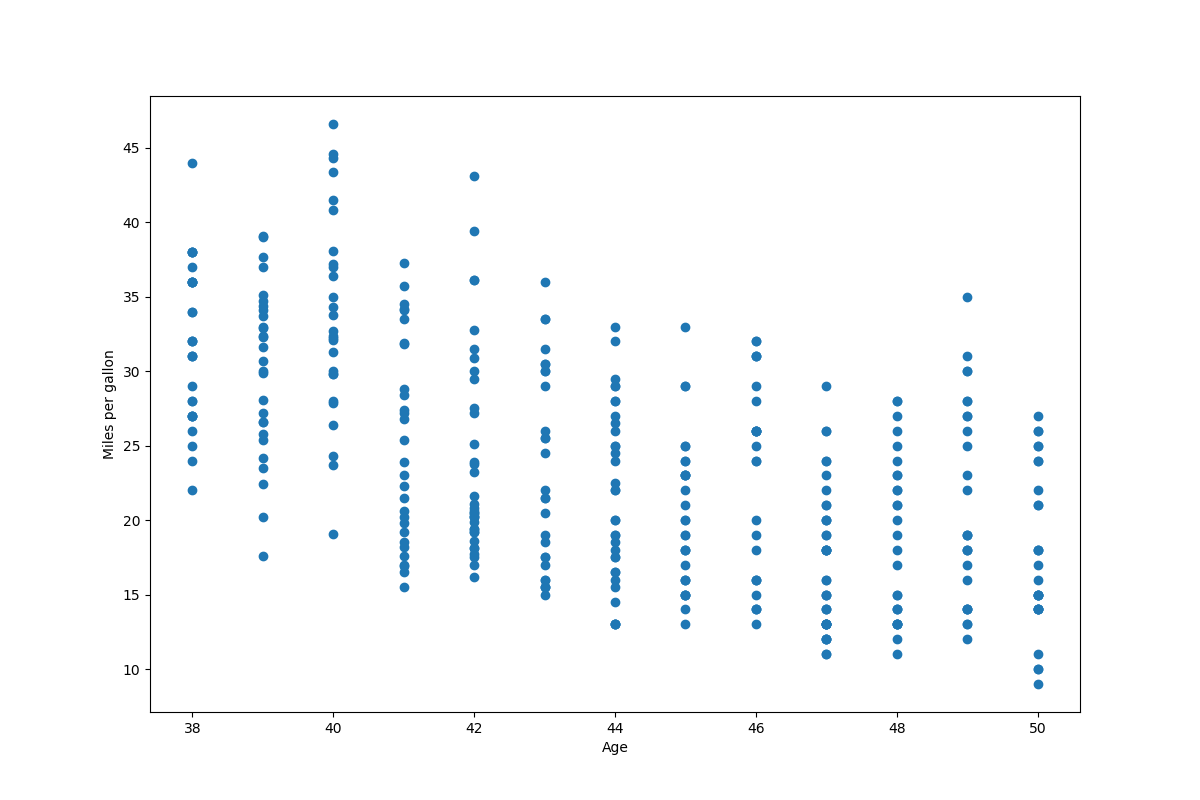

Text(0, 0.5, 'Miles per gallon')

In [11]:
## scatter plot of age vs gass
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile_df['age'], automobile_df['mpg'])
plt.xlabel('Age')
plt.ylabel('Miles per gallon')

<IPython.core.display.Javascript object>


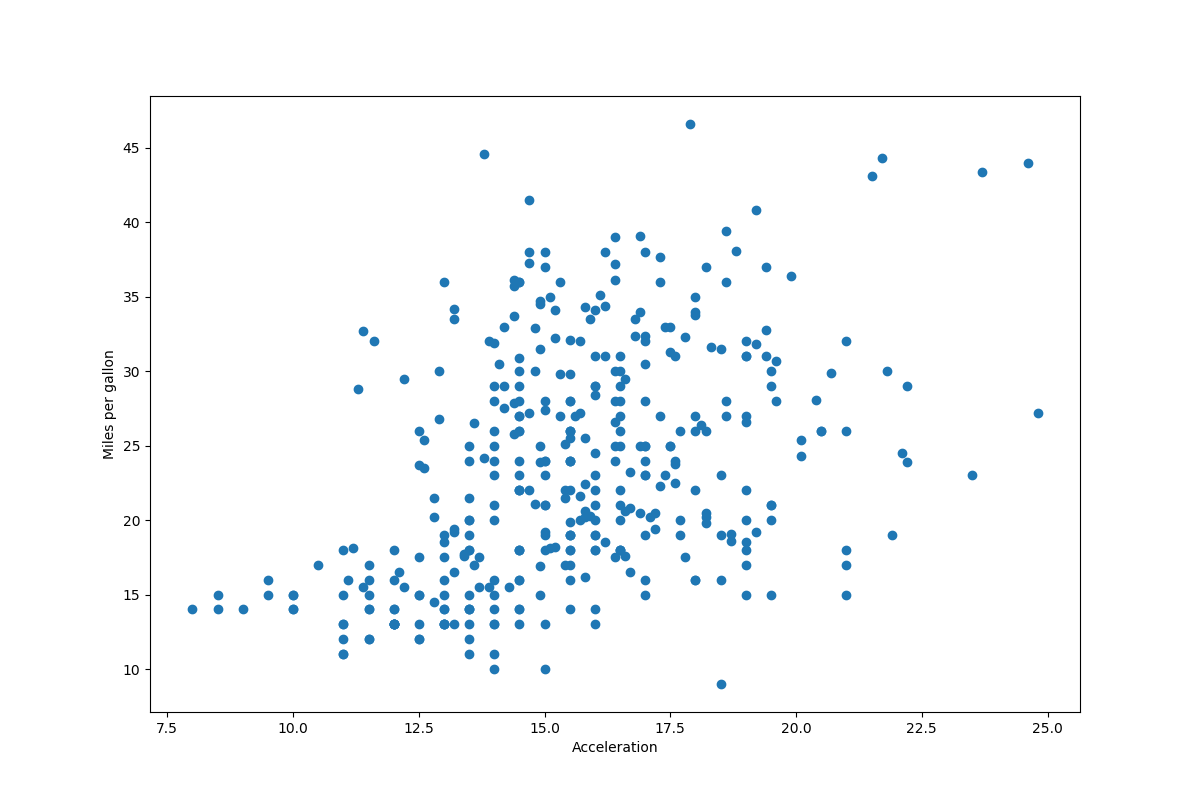

Text(0, 0.5, 'Miles per gallon')

In [12]:
## scatter plot of age vs gass
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile_df['acceleration'], automobile_df['mpg'])
plt.xlabel('Acceleration')
plt.ylabel('Miles per gallon')

<IPython.core.display.Javascript object>


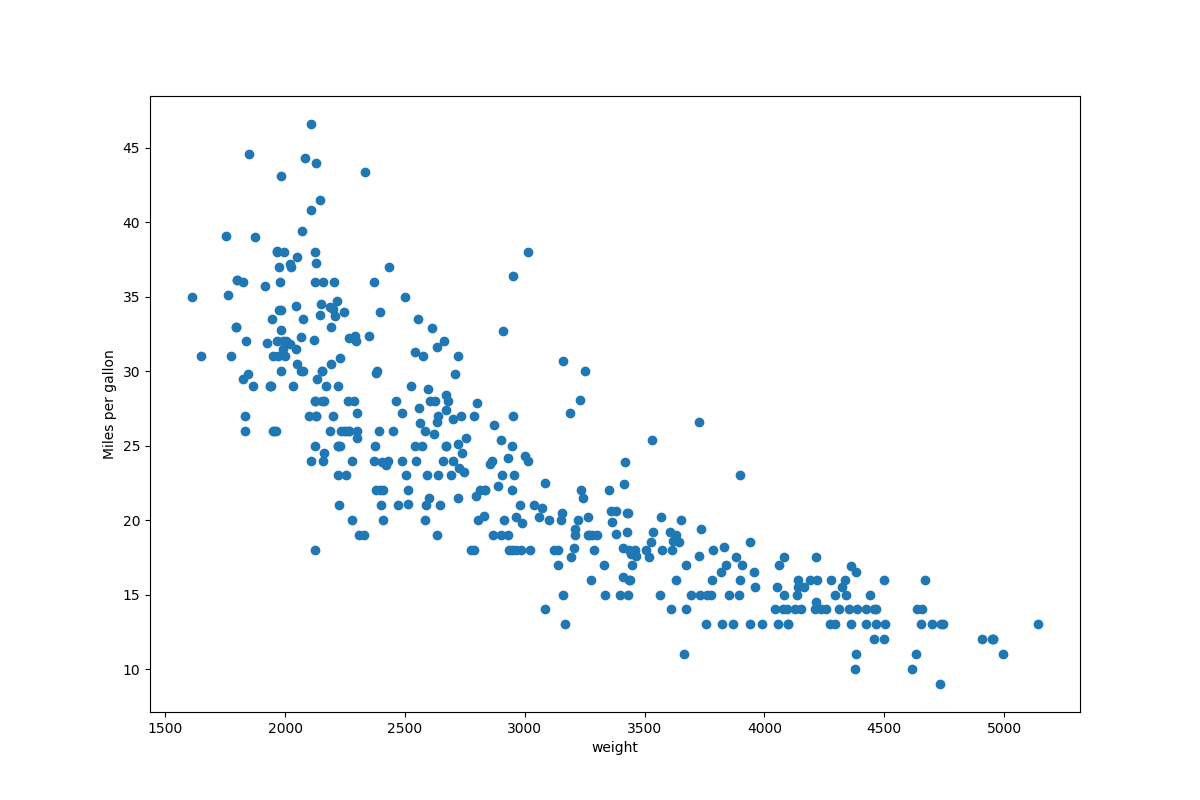

Text(0, 0.5, 'Miles per gallon')

In [13]:
## scatter plot of age vs gass
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile_df['weight'], automobile_df['mpg'])
plt.xlabel('weight')
plt.ylabel('Miles per gallon')

<IPython.core.display.Javascript object>


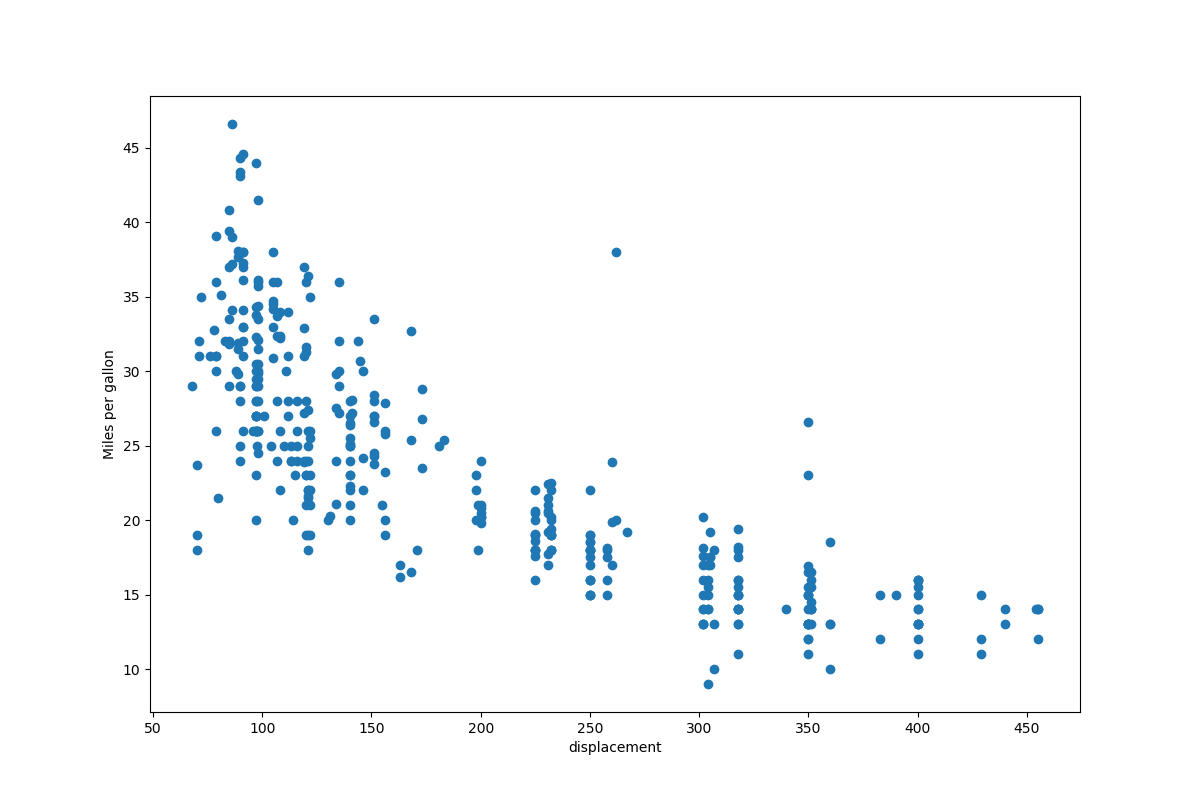

Text(0, 0.5, 'Miles per gallon')

In [14]:
## scatter plot of age vs gass
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile_df['displacement'], automobile_df['mpg'])
plt.xlabel('displacement')
plt.ylabel('Miles per gallon')

<IPython.core.display.Javascript object>


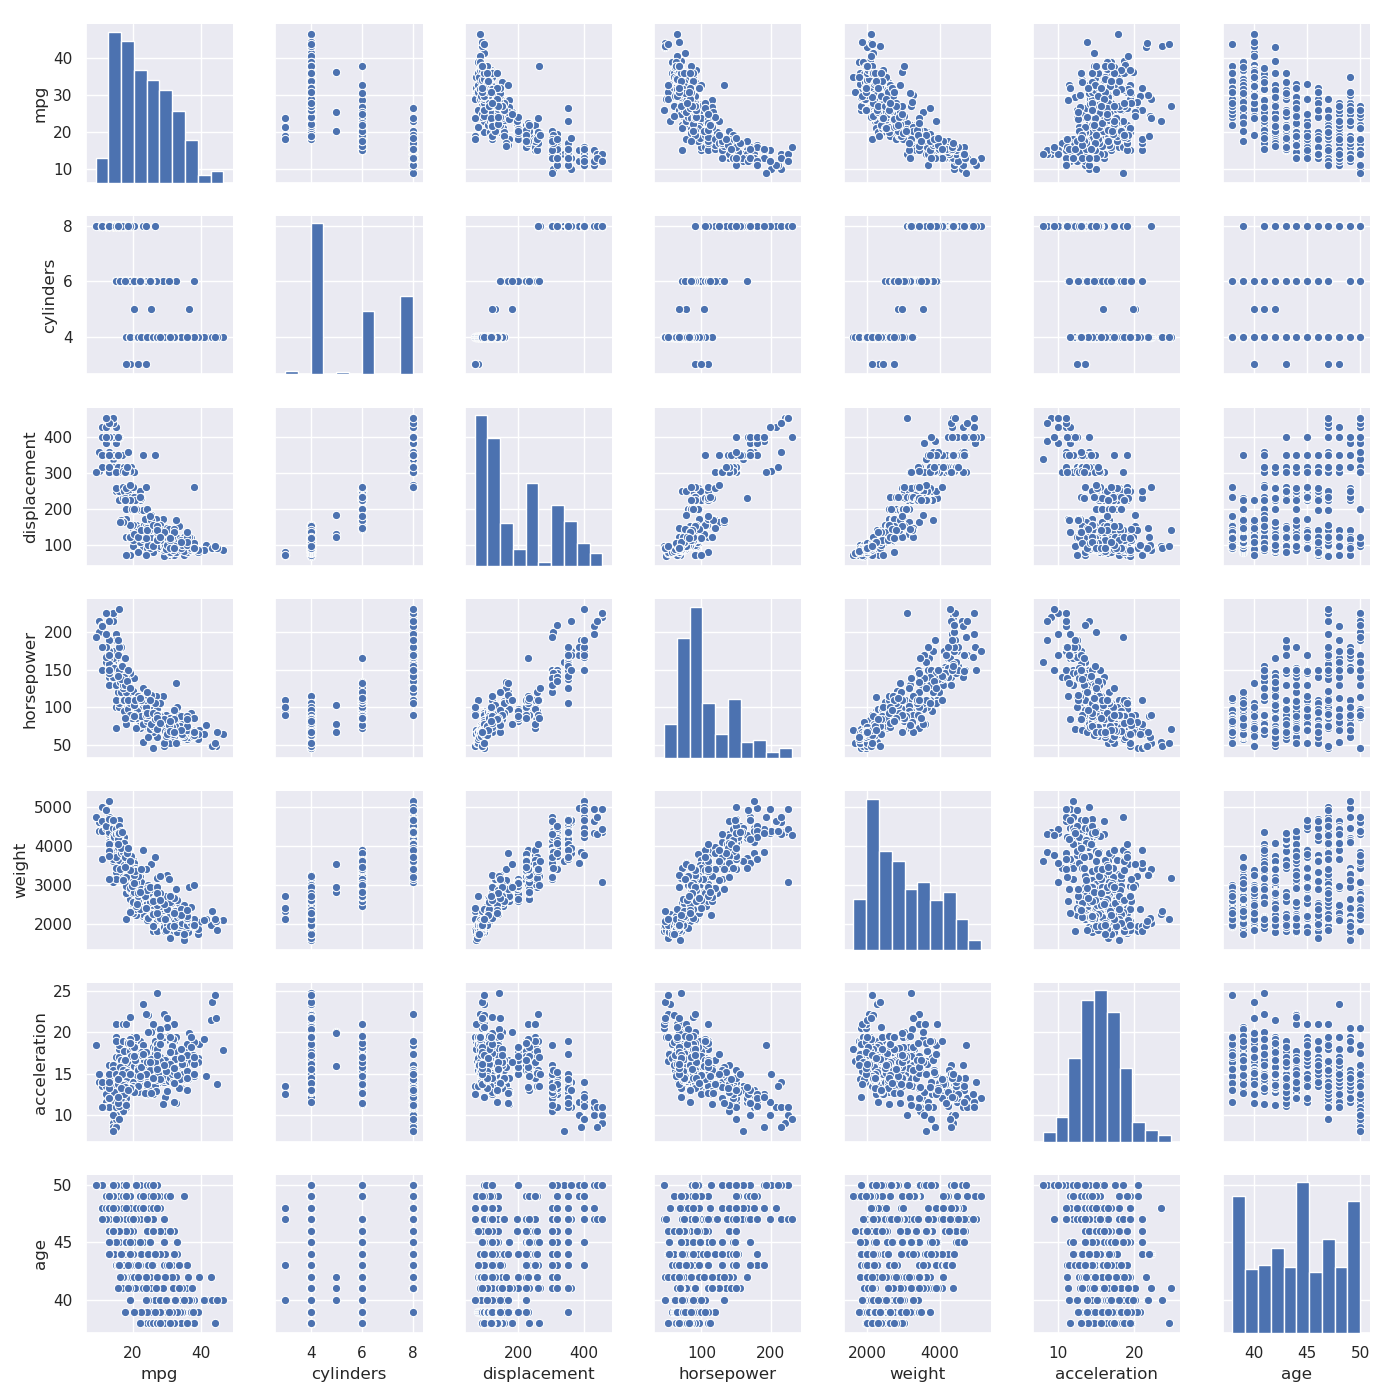

In [15]:
sns.set()
cols = list(automobile_df)
sns.pairplot(automobile_df[cols], height=2)
plt.show()

<IPython.core.display.Javascript object>


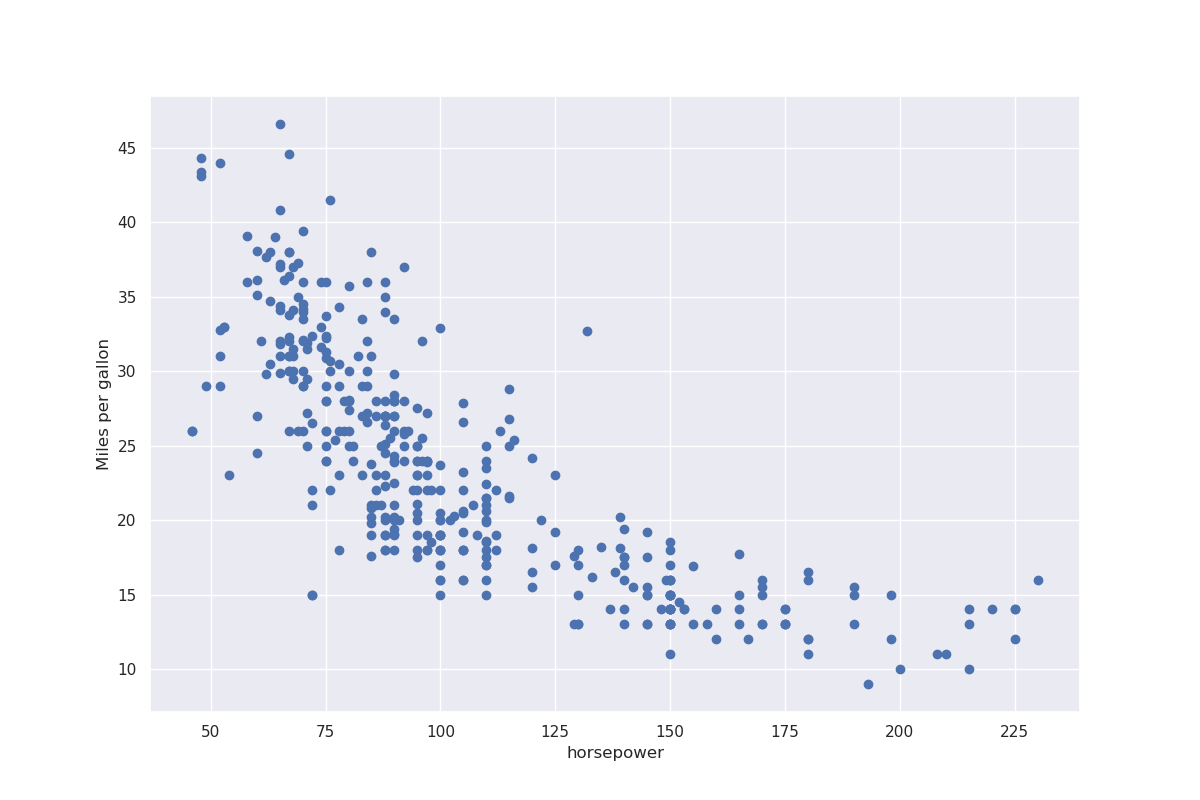

Text(0, 0.5, 'Miles per gallon')

In [16]:
## scatter plot of age vs gass
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile_df['horsepower'], automobile_df['mpg'])
plt.xlabel('horsepower')
plt.ylabel('Miles per gallon')

<IPython.core.display.Javascript object>


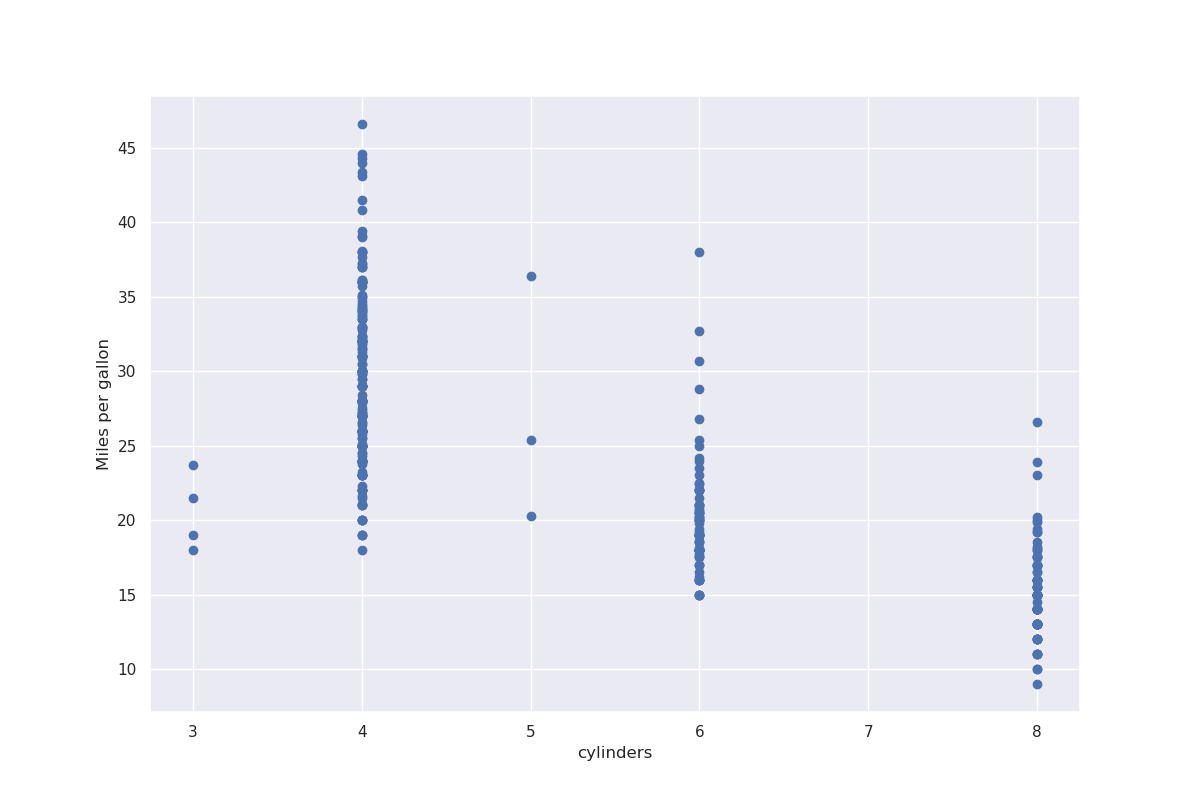

Text(0, 0.5, 'Miles per gallon')

In [17]:
## scatter plot of age vs gass
fig, ax = plt.subplots(figsize= (12,8))
plt.scatter(automobile_df['cylinders'], automobile_df['mpg'])
plt.xlabel('cylinders')
plt.ylabel('Miles per gallon')

In [18]:
automobile_corr = automobile_df.corr()
automobile_corr

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,-0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,-0.290316
age,-0.580541,0.345647,0.369855,0.416361,0.309120,-0.290316,1.000000


<IPython.core.display.Javascript object>


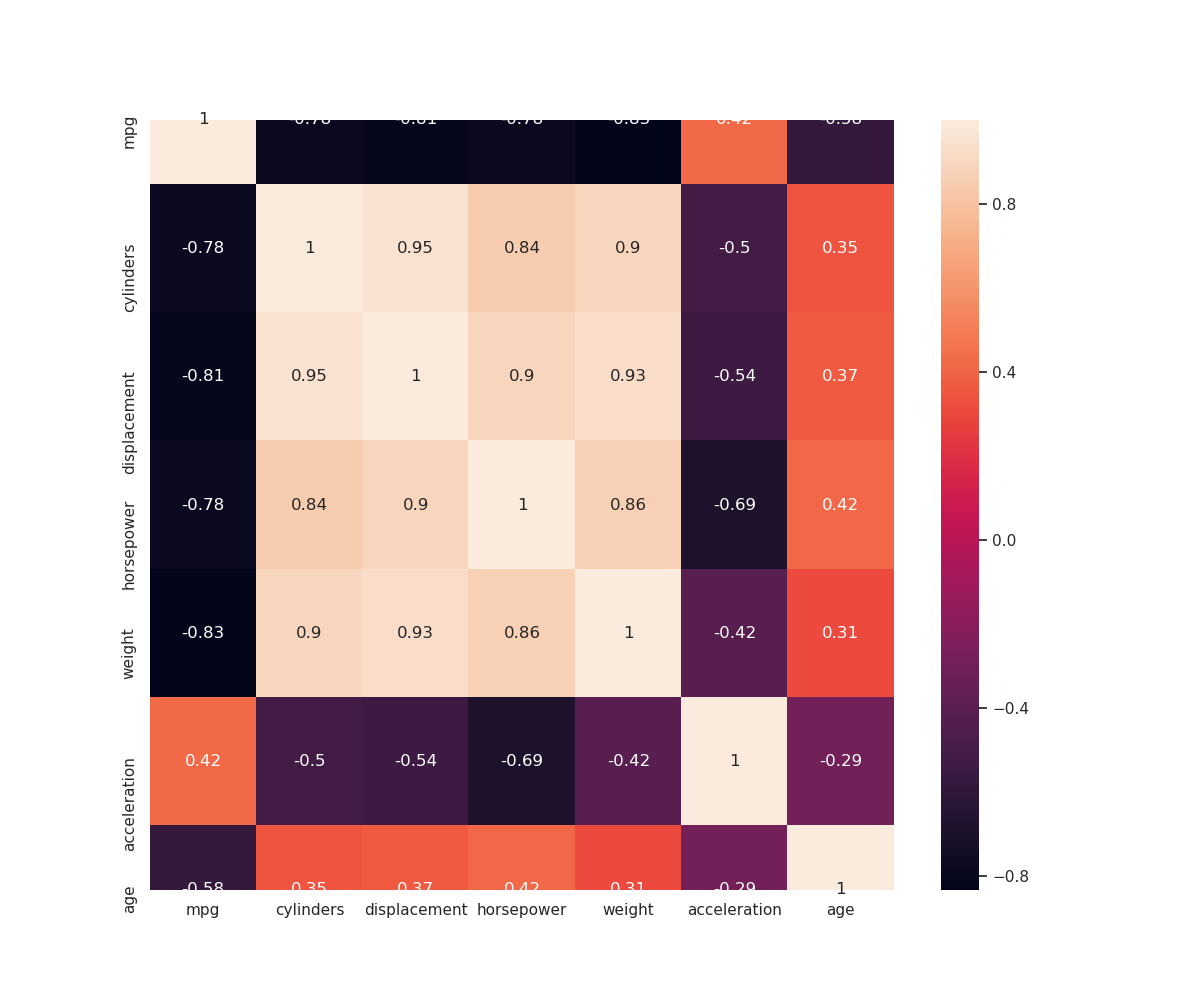

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(automobile_corr, annot=True)

In [32]:
## shuffle data and reset index and drop old index
automobile_df = automobile_df.sample(frac=1).reset_index(drop=True)
automobile_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,31.5,4,98.0,68,2045,18.5,43
1,16.0,8,400.0,230,4278,9.5,47
2,23.0,4,120.0,88,2957,17.0,45
3,25.0,4,110.0,87,2672,17.5,50
4,22.0,6,250.0,105,3353,14.5,44


In [33]:
automobile_df.to_csv('datasets/auto-mpg-processed2.csv')
!ls datasets

auto-mpg.csv  auto-mpg-processed2.csv  auto-mpg-processed.csv  exams.csv
